# Deutsch algorithm

In [11]:
import random
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

### Create the oracle

In [12]:
# Create the oracle implementing the unknown function
def make_oracle(f):
    """
    Creates an oracle for the Deutsch problem.

    Args:
        f(list): The unknown function [f(0), f(1)].

    Returns:
        QuantumCircuit: The oracle circuit.
    """
    oracle = QuantumCircuit(2)
    if  f[0]:  # if f(0) = 1 
        oracle.cx(0, 1)
        oracle.x(1)
    if  f[1]:  # if f(1) = 1
        oracle.cx(0, 1)
    return oracle

### Create Deutsch circuit

In [13]:
# Create the Deutsch circuit that uses the oracle
def make_deutsch_circuit(f):
    """
    Creates the Deutsch algorithm circuit.

    Args:
        f(list): The unknown function [f(0), f(1)].

    Returns:
        QuantumCircuit: The Deutsch algorithm circuit.
    """
    qc = QuantumCircuit(2, 1)

    # Initialize qubits
    qc.x(1)  # Set the second qubit to |1>
    qc.h(0)
    qc.h(1)

    # Query oracle
    oracle = make_oracle(f)
    qc.compose(oracle, inplace=True)

    # Apply Hadamard gate to the first qubit
    qc.h(0)

    # Measure the first qubit
    qc.measure(0, 0)
    display(qc.draw('mpl'))
    return qc



### Implement Deutsch circuit with the oracle and simulate

Unknown function, f(x) = [1, 1]  for x in {0,1}.


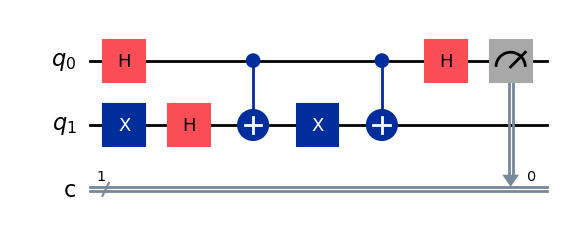

Counts = {'0': 10} ; No of shots = 10
Result_key = 0
Circuit:
     ┌───┐                    ┌───┐┌─┐
q_0: ┤ H ├───────■─────────■──┤ H ├┤M├
     ├───┤┌───┐┌─┴─┐┌───┐┌─┴─┐└───┘└╥┘
q_1: ┤ X ├┤ H ├┤ X ├┤ X ├┤ X ├──────╫─
     └───┘└───┘└───┘└───┘└───┘      ║ 
c: 1/═══════════════════════════════╩═
                                    0 
f(0)⊕f(1) = 0
The function is CONSTANT


In [22]:
# Main function to simulate Deutsch's algorithm
def main():
    
    # Generate a random unknown function
    f_test = [random.randint(0, 1) for _ in range(2)]
    #f_test = [0,0]
    #f_test = [1,0]
    print('Unknown function, f(x) =',f_test,' for x in {0,1}.')
    
    
    # Create the Deutsch algorithm circuit
    deutsch_circuit = make_deutsch_circuit(f_test)
    
    # Simulate the circuit
    nshot = 10
    simulator = AerSimulator()
    transpiled_circuit = transpile(deutsch_circuit, simulator)
    result = simulator.run(transpiled_circuit, shots=nshot).result()
    
    # Collect counts
    counts = result.get_counts()
    print('Counts =',counts,'; No of shots =',nshot)
    #result_key = max(counts, key=counts.get)
    result_key = list(counts.keys())[0] 
    print('Result_key =',result_key)
    # Print results
    #print(f"Unknown function: f(x) = [{', '.join(map(str, f_test))}]")
    print("Circuit:")
    print(deutsch_circuit)
    print(f"f(0)⊕f(1) = {result_key}")
    
    if int(result_key) == 0:   
     print('The function is CONSTANT')
    else:
     print('The function is BALANCED')   

# Execute the main function
main()